# Validación de Supuestos

## Importar Librerías y Datos

In [27]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
import statsmodels.formula.api as smf

from scipy import stats

In [10]:
Data = np.array([
    (6.40, 15.05, 18.75, 30.25, 44.85, 48.85, 51.55, 61.50, 100.44, 111.42),
    (1.32, 2.69, 3.56, 4.41, 5.35, 6.20, 7.12, 8.87, 9.80, 10.65),
    (1.15, 3.40, 4.10, 8.75, 14.82, 15.15, 15.32, 18.18, 35.19, 40.40),
])

Dataset = pd.DataFrame(
    Data.T,
    columns = ['y','x1','x2']
)

Target , *Features = Dataset.columns

Dataset

,y,x1,x2
0,6.40,1.32,1.15
1,15.05,2.69,3.40
2,18.75,3.56,4.10
3,30.25,4.41,8.75
4,44.85,5.35,14.82
5,48.85,6.20,15.15
6,51.55,7.12,15.32
7,61.50,8.87,18.18
8,100.44,9.80,35.19
9,111.42,10.65,40.40


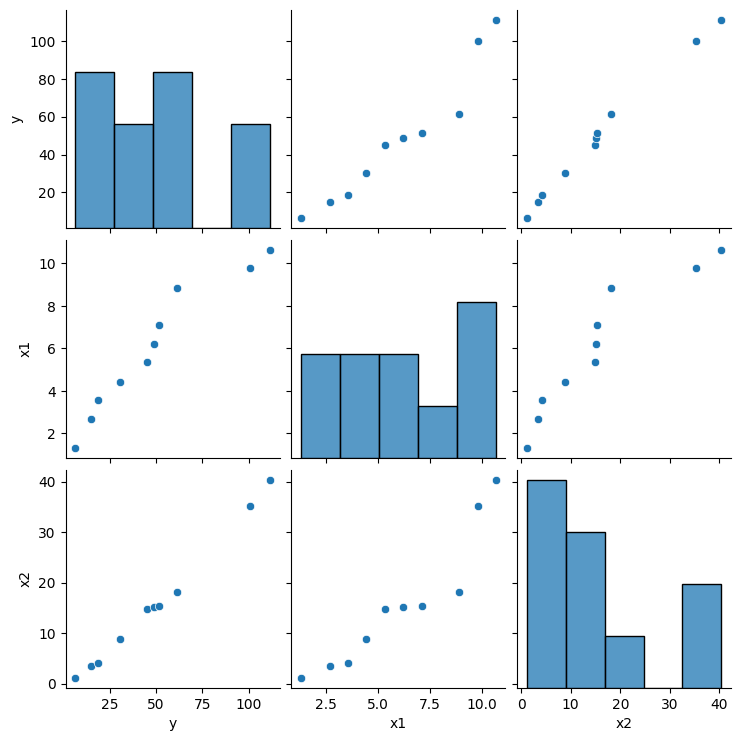

In [ ]:
sns.pairplot(
    Dataset,
)

## Supuesto de Multicolinealidad

<Axes: >

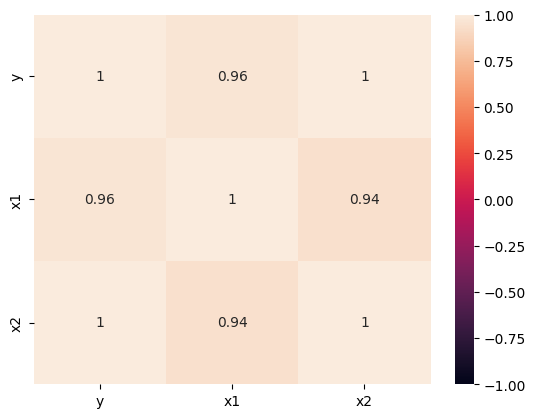

In [23]:
sns.heatmap(
    Dataset.corr(),
    vmin = -1,
    vmax = 1,
    annot = True,
) 

## Modelos

In [26]:
Model_0 = smf.ols(f'{Target} ~ ' + ' + '.join(Features), Dataset).fit()

Model_0.summary()

c:\Users\alexi\miniconda3\envs\data_science\Lib\site-packages\scipy\stats\_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=10 observations were given.
  return hypotest_fun_in(*args, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.304e+04
Date:                Mon, 25 Aug 2025   Prob (F-statistic):           3.17e-13
Time:                        09:18:15   Log-Likelihood:                -8.0687
No. Observations:                  10   AIC:                             22.14
Df Residuals:                       7   BIC:                             23.05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5772      0.599      0.964      0.367      -0.838       1.993
x1             2.7096      0.199     13.592      0.000       2.238       3.181
x2             2.0503      0.047     43.227      0.000       1.938       2.162
==============================================================================
Omnibus:                        1.281   Durbin-Watson:                   2.815
Prob(Omnibus):                  0.527   Jarque-Bera (JB):                0.371
Skew:                           0.469   Prob(JB):                        0.831
Kurtosis:                       2.906   Cond. No.                         63.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
Model_2 = smf.ols(f'{Target} ~ x2', Dataset).fit()

Model_2.summary()

c:\Users\alexi\miniconda3\envs\data_science\Lib\site-packages\scipy\stats\_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=10 observations were given.
  return hypotest_fun_in(*args, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                     1080.
Date:                Mon, 25 Aug 2025   Prob (F-statistic):           8.01e-10
Time:                        09:17:41   Log-Likelihood:                -24.620
No. Observations:                  10   AIC:                             53.24
Df Residuals:                       8   BIC:                             53.84
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.3697      1.614      4.567      0.002       3.649      11.091
x2             2.6548      0.081     32.869      0.000       2.469       2.841
==============================================================================
Omnibus:                        1.393   Durbin-Watson:                   1.002
Prob(Omnibus):                  0.498   Jarque-Bera (JB):                0.679
Skew:                           0.614   Prob(JB):                        0.712
Kurtosis:                       2.654   Cond. No.                         32.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
sm.stats.anova_lm(Model_0,Model_2)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,7.0,2.940098,0.0,NaN,NaN,NaN
1,8.0,80.532271,-1.0,-77.592173,7.707933,NaN


In [29]:
Model_3 = smf.ols(f'{Target} ~ ' + ' + '.join([*Features,'0']), Dataset).fit()

Model_3.summary()

c:\Users\alexi\miniconda3\envs\data_science\Lib\site-packages\scipy\stats\_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=10 observations were given.
  return hypotest_fun_in(*args, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          4.188e+04
Date:                Mon, 25 Aug 2025   Prob (F-statistic):                    8.32e-17
Time:                        09:21:25   Log-Likelihood:                         -8.6922
No. Observations:                  10   AIC:                                      21.38
Df Residuals:                       8   BIC:                                      21.99
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             2.8700      0.109     26.265      0.000       2.618       3.122
x2             2.0214      0.037     55.276      0.000       1.937       2.106
==============================================================================
Omnibus:                        0.062   Durbin-Watson:                   2.839
Prob(Omnibus):                  0.969   Jarque-Bera (JB):                0.161
Skew:                           0.112   Prob(JB):                        0.923
Kurtosis:                       2.420   Cond. No.                         11.8
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
sm.stats.anova_lm(Model_0,Model_3)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,7.0,2.940098,0.0,NaN,NaN,NaN
1,8.0,3.330601,-1.0,-0.390503,0.937975,NaN


## Normalidad de Errores

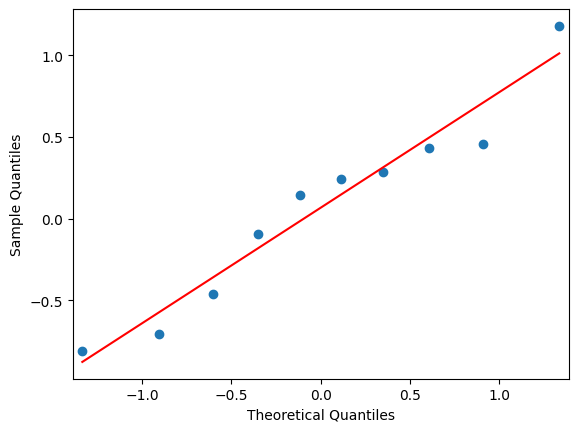

In [35]:
sm.qqplot(
    Model_3.resid,
    line = 'r',
);

In [ ]:
# Prueba de normalidad
stats.shapiro(Model_3.resid)

ShapiroResult(statistic=np.float64(0.9505823214839981), pvalue=np.float64(0.6753937697462994))